## Student Performance Indicator

### Life cycle of a Machine Learning Project:

- Understading the problem statement
- Data Collection
- Data description and sanity checks
- Exploratory Data Analysis
- Pre-Processing
- Model Training
- Best model selection

### 1) Problem statement

- This project understands how the student's performance is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection

- Dataset source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 columns and 1000 rows.

#### 2.1) Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

**Import the CSV Data as a Pandas Dataframe**

In [2]:
df_students = pd.read_csv('../data/raw/stud.csv')

In [3]:
# Show top 5 records
df_students.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Dataset shape
df_students.shape

(1000, 8)

#### 2.2) Dataset Info

- gender: sex of the students (male/female)
- race ethnicity: ethnicity of the students (determined by groups)
- parental level of education: parent's final level of education (bachelor's degree, associate's degree, hight school, etc)
- lunch: having lunch before test (standard or free/reduced)
- test preparation course: completed or not completed the course before test
- actual math score
- actual reading score
- actual writing score

### 3) Data description and sanity checks

**What to perform here?**

- Check missing values
- Check duplicated values
- Check data types
- Check descriptive statistics for the numerical and categorical columns
- Check some unique values of each column

#### 3.1) Check missing values

In [5]:
df_students.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values on the dataset**

#### 3.2) Check duplicated values

In [6]:
df_students.duplicated().sum()

0

**There are no duplicated value in the dataset**

#### 3.3) Check data types

In [7]:
df_students.dtypes # or df_students.info()

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

#### 3.4) Descriptive statistics

In [8]:
df_numerical = df_students.select_dtypes(exclude='object')
df_categorical = df_students.select_dtypes(include='object')

##### 3.4.1) Numerical

In [13]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


**Insights**:
- From above description of the numerical data, all means and standard deviations are very close to each other.
- While there is a minimum score of 0 for math, it seems like the students perform batter in the other subjects with the mininimum of 17 and 10.

##### 3.4.2) Categorial

In [15]:
df_categorical.describe().T

,count,unique,top,freq
gender,1000,2,female,518
race_ethnicity,1000,5,group C,319
parental_level_of_education,1000,6,some college,226
lunch,1000,2,standard,645
test_preparation_course,1000,2,none,642


**Insights:**
- It would be interisting to know wich gender is group C, the most frequent one.
- Most students don't take the test preparation course.

### 3.5) Check some unique values of each column

In [17]:
for column in df_categorical.columns:
    print(f'Categories in {column} variable: ', df_students[column].unique(), '\n')

Categories in gender variable:  ['female' 'male'] 

Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E'] 

Categories in parental_level_of_education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Categories in lunch variable:  ['standard' 'free/reduced'] 

Categories in test_preparation_course variable:  ['none' 'completed'] 



### After making the descriptive analysis, I reached the conclusion of creating a "average_score" feature, being the sum of the scores we have divided by 3. It will be our target.

In [22]:
df_students['average_score'] = (df_students['math_score'] + df_students['reading_score'] + df_students['writing_score']) / 3

### 4) Exploring Data (Visualization)

#### 4.1) Visualize score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

##### 4.1.1 Histogram and KDE

**Average Score**

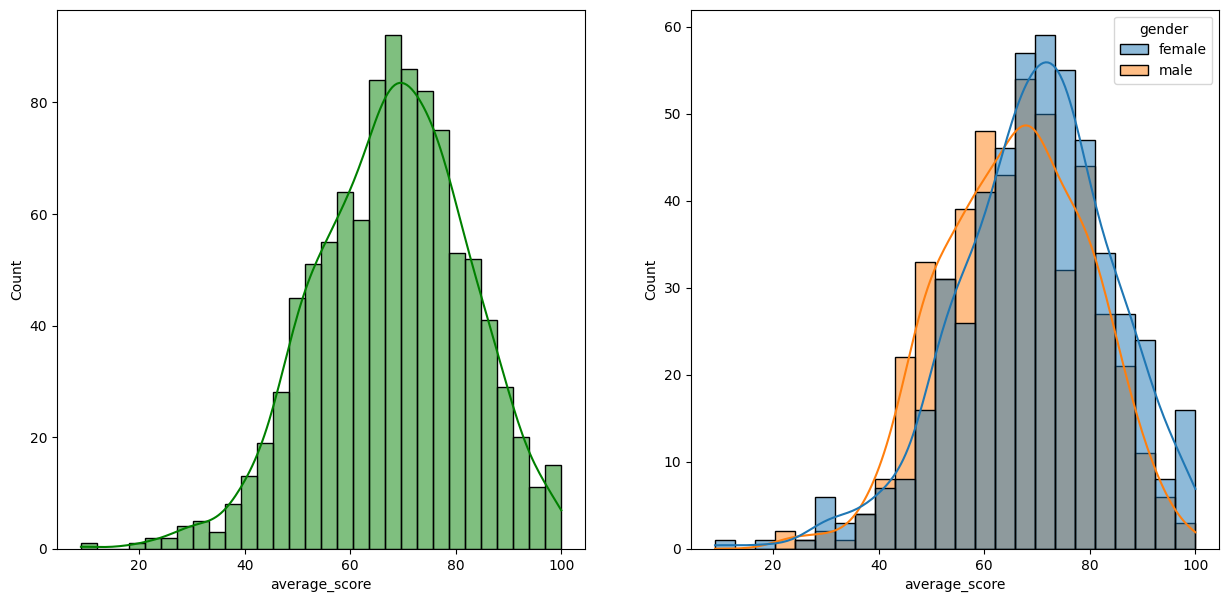

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_students, x='average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df_students, x='average_score', kde=True, hue='gender')
plt.show()

**Insights**:
- Female students to performed better than male. (Note: but there are more females, so I should use some statistics to check it)

**Lunch**

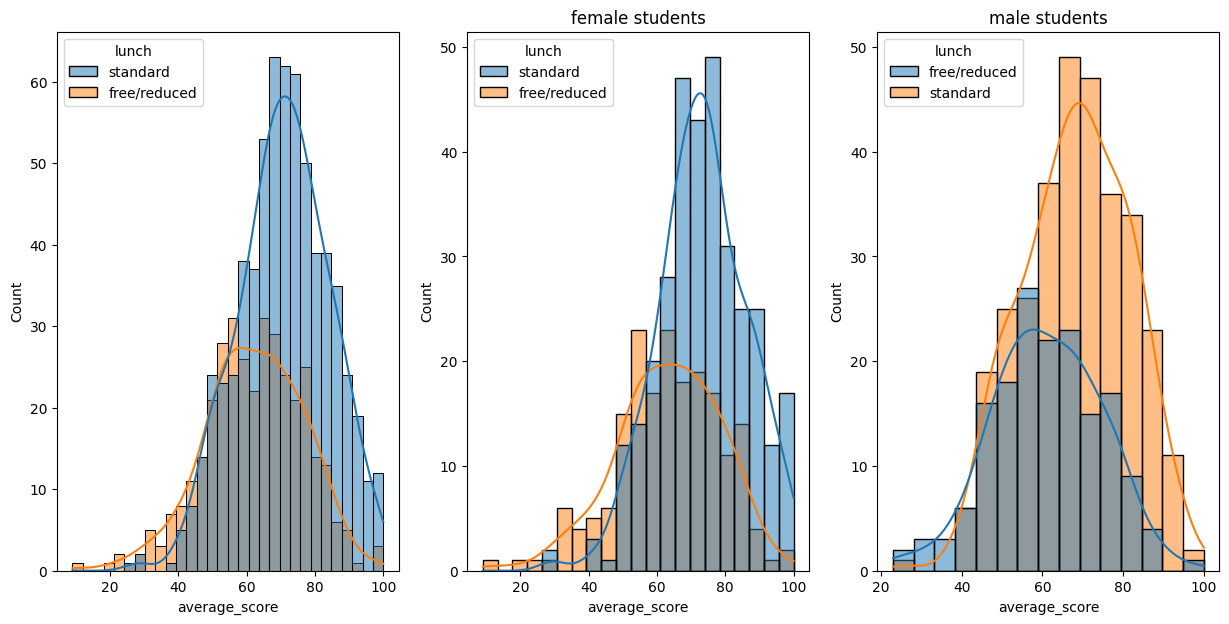

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df_students, x='average_score', bins=30, kde=True, color='g', hue='lunch')
plt.subplot(132)
sns.histplot(data=df_students[df_students.gender=='female'], x='average_score', kde=True, hue='lunch').set_title('female students')
plt.subplot(133)
sns.histplot(data=df_students[df_students.gender=='male'], x='average_score', kde=True, hue='lunch').set_title('male students')
plt.show()

**Insights**:
- We can see that standard lunch is generally more negatively skewed than the free/reduced, wich indicates that students tend to perfom better with standard.

**Race ethnicity**

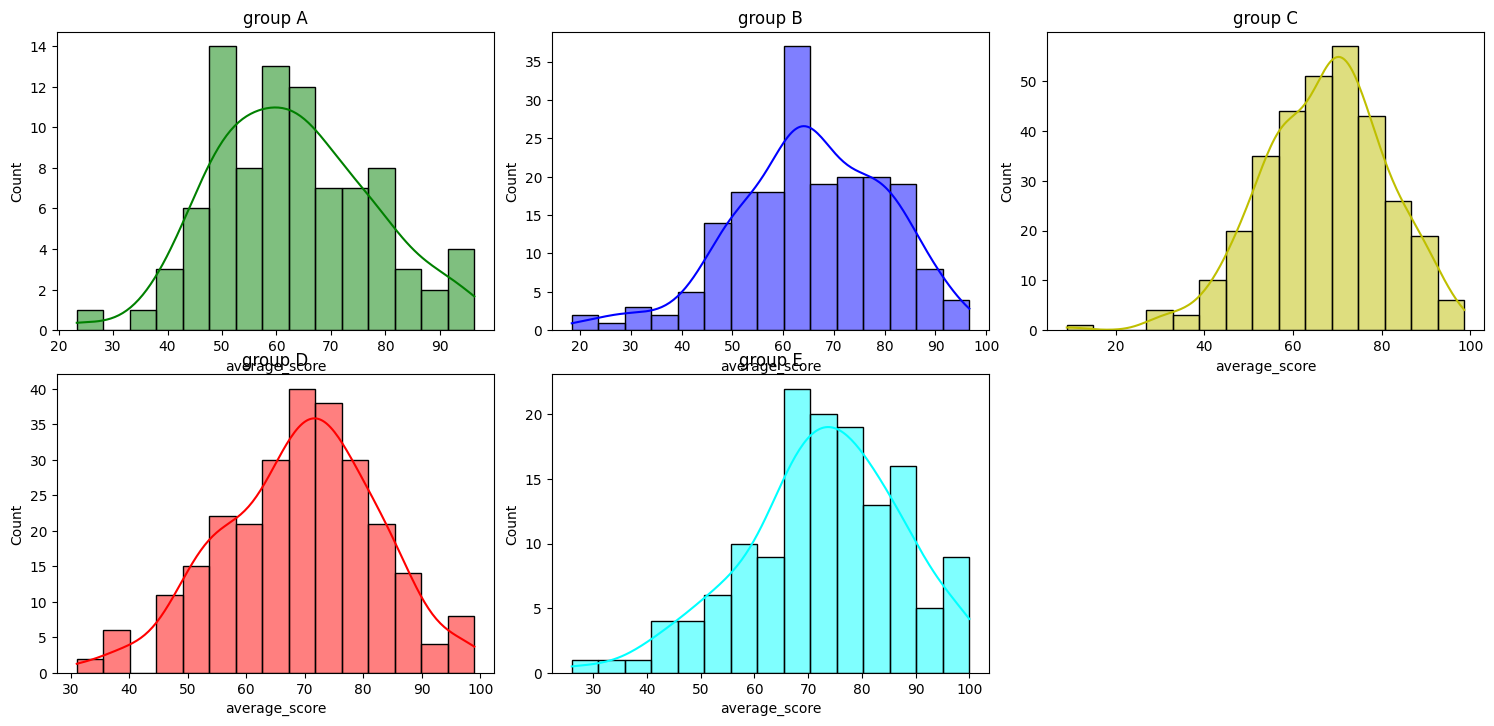

In [45]:
fig, axs = plt.subplots(2, 3, figsize=(15, 7))
plt.tight_layout()

sns.histplot(data=df_students[df_students.race_ethnicity=='group A'], x='average_score', bins=15, kde=True, color='green', ax=axs[0, 0]).set_title('group A')
sns.histplot(data=df_students[df_students.race_ethnicity=='group B'], x='average_score', bins=15, kde=True, color='blue', ax=axs[0, 1]).set_title('group B')
sns.histplot(data=df_students[df_students.race_ethnicity=='group C'], x='average_score', bins=15, kde=True, color='yellow', ax=axs[0, 2]).set_title('group C')
sns.histplot(data=df_students[df_students.race_ethnicity=='group D'], x='average_score', bins=15, kde=True, color='red', ax=axs[1, 0]).set_title('group D')
sns.histplot(data=df_students[df_students.race_ethnicity=='group E'], x='average_score', bins=15, kde=True, color='aqua', ax=axs[1, 1]).set_title('group E')

# # Hiding the empty subplot in the last column and last row
axs[1, 2].axis('off')
plt.show()

**Test Preparation Course**

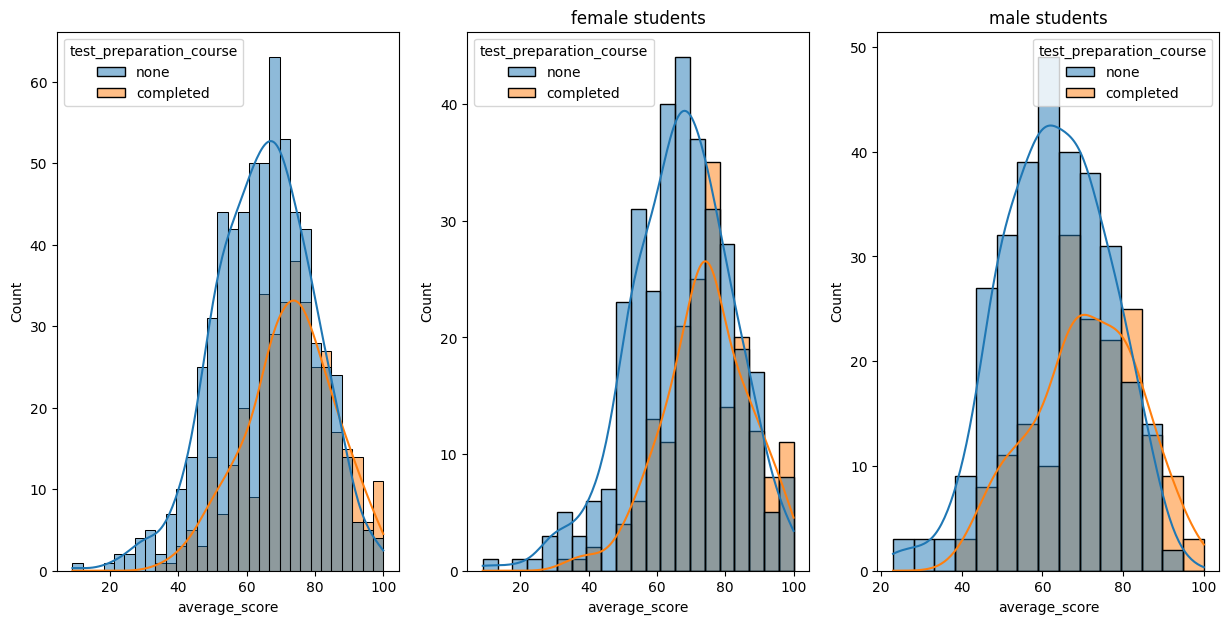

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df_students, x='average_score', bins=30, kde=True, color='g', hue='test_preparation_course')
plt.subplot(132)
sns.histplot(data=df_students[df_students.gender=='female'], x='average_score', kde=True, hue='test_preparation_course').set_title('female students')
plt.subplot(133)
sns.histplot(data=df_students[df_students.gender=='male'], x='average_score', kde=True, hue='test_preparation_course').set_title('male students')
plt.show()

**Parental Level of Education**

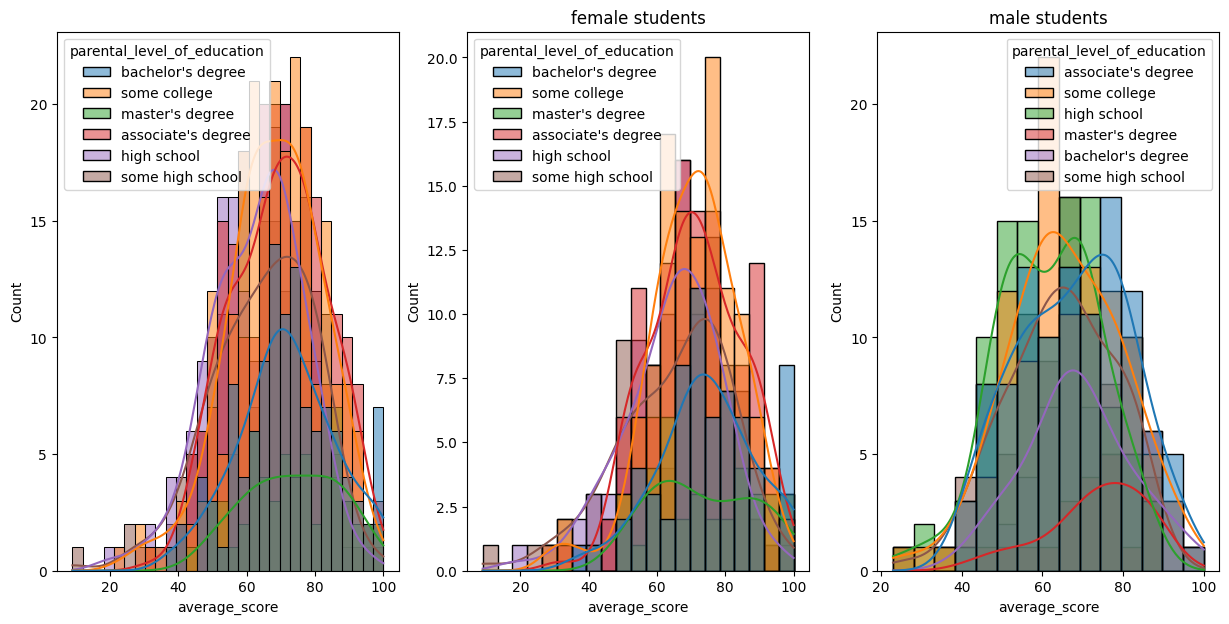

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df_students, x='average_score', bins=30, kde=True, color='g', hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df_students[df_students.gender=='female'], x='average_score', kde=True, hue='parental_level_of_education').set_title('female students')
plt.subplot(133)
sns.histplot(data=df_students[df_students.gender=='male'], x='average_score', kde=True, hue='parental_level_of_education').set_title('male students')
plt.show()

**Distribution of features per number of students using pieplot**

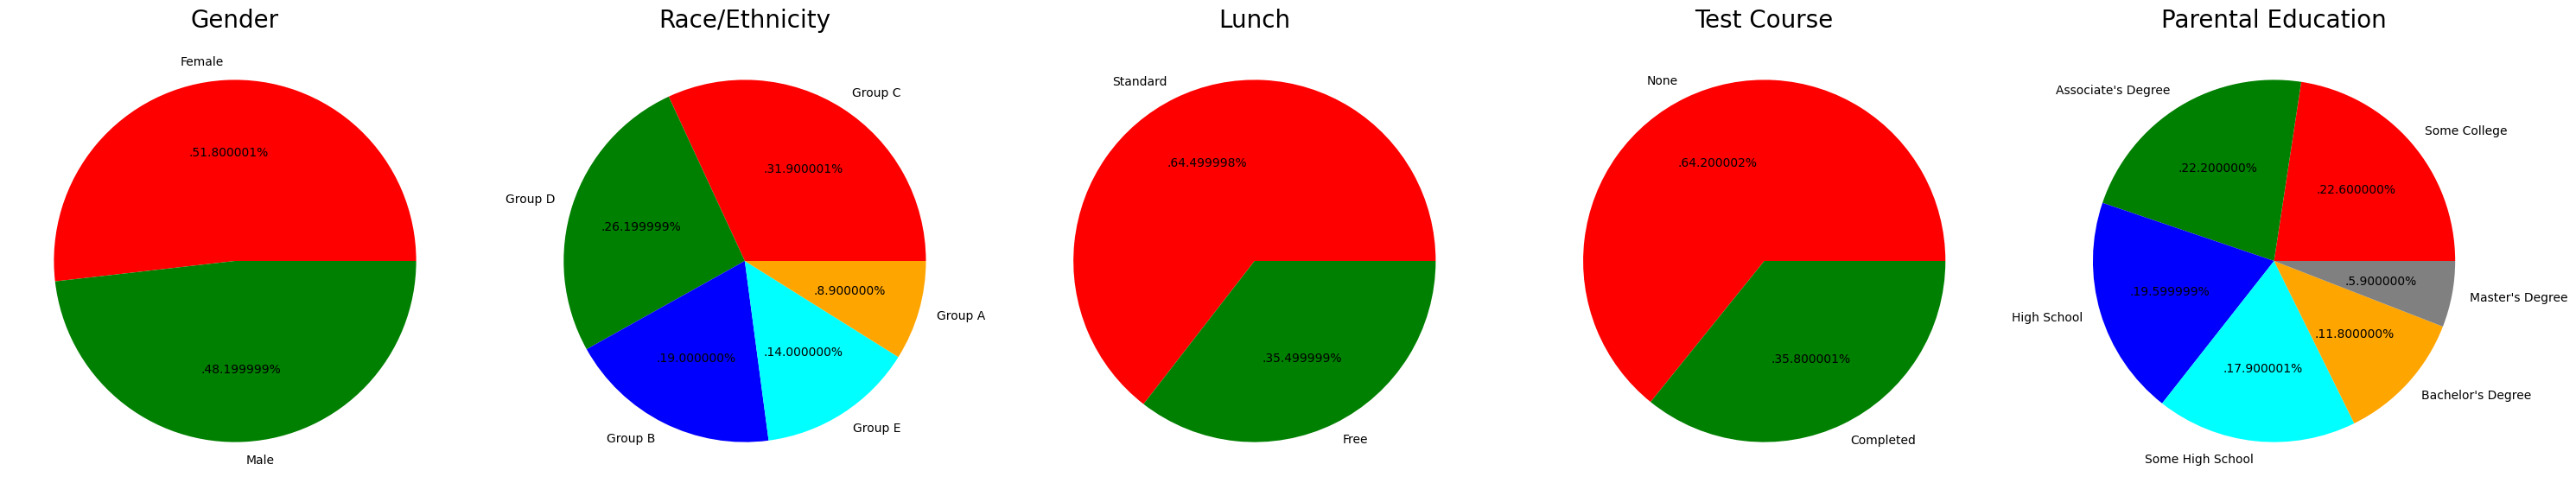

In [48]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df_students['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df_students['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df_students['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df_students['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df_students['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()